# T027 · Kinase similarity: ligand-profile

Authors:

- Talia B. Kimber, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Dominique Sydow, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Andrea Volkamer, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

The aim of this talktorial is to investigate kinase similarity through ligand profiling. We make the following assumption: if a compound was tested as active on two different kinases, then we could assume that these two same kinases may have some degree of similarity. 

### Contents in *Theory*

* Kinase dataset
* Kinase similarity descriptor: ligand-profile
    * Kinase similarity
    * Kinase promiscuity

### Contents in *Practical*

* Retrieve the data
* Preprocess the data
    * Kinases of interest
    * Hit or non-hit
* Show kinase promiscuity
* Compare kinases
* Visualize similarity as kinase matrix
* Visualize similarity as phylogenetic tree

### References

* Kinase dataset: [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629) 
* Kinase similarity descriptor: ligand-profile

In [1]:
# TODO: ADD

## Theory

### Kinase dataset

We will use nine kinases from [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629), which aimed to understand kinase similarities within different combinations of kinase on- and off-targets (also called anti-targets):

 

> We aggregated the investigated kinases in “profiles” (Table 2). Profile 1 combined **EGFR** and **ErbB2** as targets (indicated by a ‘+’) and **BRAF** (from rapidly accelerated fibrosarcoma isoform B) as a (general) anti-target (designated by a ‘—’). Out of similar considerations, Profile 2 consisted of EGFR and **PI3K** as targets and BRAF as anti-target. This profile is expected to be more challenging as PI3K is an atypical kinase and thus less similar to EGFR than for example ErbB2 used in Profile 1. Profile 3, comprised of EGFR and **VEGFR2** as targets and BRAF as anti-target, was contrasted with the hit rate that we found with a standard docking against the single target VEGFR2 (Profile 4).
> To broaden the comparison and obtain an estimate for the promiscuity of each compound, the kinases **CDK2** (cyclic-dependent kinase 2), **LCK** (lymphocyte-specific protein tyrosine kinase), **MET** (mesenchymal-epithelial transition factor) and **p38α** (p38 mitogen activated protein kinase α) were included in the experimental assay panel and the structure-based bioinformatics comparison as commonly used anti-targets.

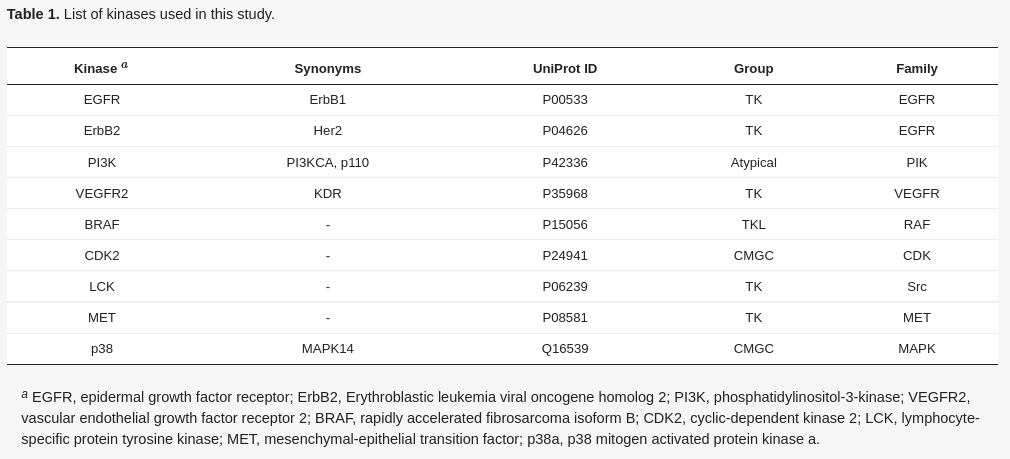

*Figure 1:* 
Kinases used in this notebook, taken from [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629) (Table 1).

In this talktorial, we focus on bioactivity retrieve from the well-known [ChEMBL](https://www.ebi.ac.uk/chembl/) database. We query the data focusing on human-kinases. Luckily, a curated version of ChEMBL28 is already freely available in the openkinome organization, see https://github.com/openkinome.

In drug design, it is common to determine the activity of a compound against as a "hit" or "non hit". Practically speaking, this is done using a cutoff value for measured activity. If the activity is greater to the cutoff, the compound is labeled as active, and inactive otherwise.

In [2]:
# TODO: add reference to other talktorial.

### Kinase similarity descriptor: ligand-profile

As a measure of similarity, we use ligand profiling in this talktorial.

#### Kinase similarity

We use the following metric as similarity between kinases $K_i$ and $K_j$:

$$
\text{similarity}(K_i, K_j) = \frac{\#\text{ of compounds that were tested as actives on $K_i$ and $K_j$}}
{\#\text{ of compounds that were tested on both $K_i$ and $K_j$}}
$$

Assuming that only one compound was tested on two kinases, and that the compound was tested as active for one and inactive for the other, then the similarity between these two kinases would be null.

#### Kinase promiscuity
Computing the similarity between a kinase and itself may be interpreted as kinase promiscuity, where the similarity descrived above would therefore represent the fraction of active compounds over all tested compounds.

## Practical

In [3]:
# !pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
from collections import Counter

In [5]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Retrieve the data

We retrieve a pre-curated version of ChEMBL v.28 freely available at openkinome, see https://github.com/openkinome/kinodata/releases/tag/v0.2.

In [6]:
# TODO: Take v.29 instead of v.28.

In [7]:
path = "https://github.com/openkinome/kinodata/releases/download/\
v0.2/activities-chembl28_v0.2.zip"
data = pd.read_csv(path, index_col=None)
print(f"Current shape of data: {data.shape}")
data.head()

Current shape of data: (186972, 17)


,Unnamed: 0,activities.activity_id,assays.chembl_id,target_dictionary.chembl_id,molecule_dictionary.chembl_id,molecule_dictionary.max_phase,activities.standard_type,activities.standard_value,activities.standard_units,compound_structures.canonical_smiles,compound_structures.standard_inchi,component_sequences.sequence,assays.confidence_score,docs.chembl_id,docs.year,docs.authors,UniprotID
0,96251,16291323,CHEMBL3705523,CHEMBL2973,CHEMBL3666724,0,pIC50,14.096910,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C31H33N7O3/c1-2-4-29(40)33-22-6-3-5-2...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116
1,97672,16306943,CHEMBL3705523,CHEMBL2973,CHEMBL1968705,0,pIC50,14.000000,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C31H33N7O2/c1-2-6-29(39)33-23-8-5-7-2...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116
2,93879,16264754,CHEMBL3705523,CHEMBL2973,CHEMBL3666728,0,pIC50,14.000000,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C34H40N8O3/c1-5-7-32(43)36-24-9-6-8-2...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116
3,100714,16340050,CHEMBL3705523,CHEMBL2973,CHEMBL1997433,0,pIC50,13.958607,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C28H28N6O3/c1-3-5-26(35)30-20-7-4-6-1...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116
4,95877,16287186,CHEMBL3705523,CHEMBL2973,CHEMBL3666721,0,pIC50,13.920819,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C32H35N7O2/c1-2-7-30(40)34-24-9-6-8-2...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116


### Preprocess the data

We look at the type of activity and the associated units.

In [8]:
print(f"Activities: {set(data['activities.standard_type'])}\n"
      f"Units: {set(data['activities.standard_units'])}")

Activities: {'pKd', 'pIC50', 'pKi'}
Units: {'nM'}


Let's keep the entries which have pIC50 values only.

In [9]:
data = data[data["activities.standard_type"] == "pIC50"]

The dataframe contains many columns that won't be necessary for the rest of the notebook and are therefore removed. Only relevant information is kept, namely the canonical SMILES of the compound, the measured activity and the uniprot ID of the kinase. We rename these columns for readability.

In [10]:
data = data[["compound_structures.canonical_smiles",
             "activities.standard_value",
             "UniprotID"]]
data = data.rename(columns={"compound_structures.canonical_smiles": "smiles",
                            "activities.standard_value": "activity_value"})

In [11]:
print(f"Current shape of data: {data.shape}")
data.head()

Current shape of data: (159978, 3)


,smiles,activity_value,UniprotID
0,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,14.096910,O75116
1,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,14.000000,O75116
2,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,14.000000,O75116
3,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,13.958607,O75116
4,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,13.920819,O75116


We also drop NA values.

In [12]:
data = data.dropna()
print(f"Current shape of data: {data.shape}")

Current shape of data: (159823, 3)


#### Kinases of interest

We focus on the kinases of interest and map them to their uniprot IDs in accordance with the Table in the Theory.

In [13]:
name_to_uniprot = {'EGFR': 'P00533',
                   'ErbB2': 'P04626',
                   'BRAF': 'P15056',
                   'CDK2': 'P24941',
                   'LCK': 'P06239',
                   'MET': 'P08581',
                   'p38a': 'Q16539',
                   'KDR': 'P35968',
                   'p110a': 'P42336'}

We keep data for these kinases only:

In [14]:
data = data[data["UniprotID"].isin(name_to_uniprot.values())]
print(f"Current shape of data: {data.shape}")

Current shape of data: (33169, 3)


In [15]:
data

,smiles,activity_value,UniprotID
57,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,P00533
98,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,P00533
101,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,P00533
139,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,P00533
140,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,P00533
...,...,...,...
186925,Nc1nc2cc(-c3cncc(S(N)(=O)=O)c3)ccn2n1,1.800000,P42336
186927,O=C(/C=C/c1ccc(O)c(O)c1)c1ccc(O[C@@H]2O[C@H](C...,1.721246,P00533
186929,CS(=O)(=O)c1cncc(-c2ccn3nc(N)nc3c2)c1,1.700000,P42336
186936,O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O,1.602060,P00533


Let's look at EGFR data:

In [16]:
EGFR_data = data[data["UniprotID"] == "P00533"]

Some compounds have been tested several times against EGFR, as shown below.

In [17]:
measured_compounds = Counter(EGFR_data["smiles"])
measured_compounds.most_common()[0:5]

[('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1', 40),
 ('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1', 24),
 ('C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(OC)cc1N(C)CCN(C)C', 12),
 ('C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC)ncc2Cl)c1', 10),
 ('CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4',
  7)]

As a simple workaround, we keep the value for which the compound has the highest activity value.

In [18]:
data = data.groupby(["UniprotID",
                     "smiles"])['activity_value'].max().reset_index()
data

,UniprotID,smiles,activity_value
0,P00533,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccc(C(...,5.336488
1,P00533,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1cccc2c...,5.996539
2,P00533,Br.CC[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1...,8.397940
3,P00533,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,7.207608
4,P00533,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,8.420216
...,...,...,...
32683,Q16539,c1ccc(-c2nn3c(c2-c2ccnc4ccccc24)CCC3)nc1,5.102373
32684,Q16539,c1ccc(Cn2cc(-c3ccnc4ccccc34)c(-c3ccccn3)n2)cc1,6.292430
32685,Q16539,c1ccc(Nc2ccc3c(-c4ccccc4)n[nH]c3c2)cc1,7.522879
32686,Q16539,c1ccc(Sc2ncnc3c2N=C(c2cccnc2)c2ccccc2S3)cc1,5.903090


#### Hit or non-hit

Finally, we binarize the pIC50 values to obtain hit or non-hit using a cut-off. We use a cut-off of $6.3$, similarly to the referenced paper.

In [19]:
cutoff = 6.3

In [20]:
def binarize_pic50(pic50_value, threshold):
    """
    Binarizes a scalar value given a threshold.

    Parameters
    ----------
    pic50_value : float
        The measurement pIC50 value of a kinase-ligand pair.
    threshold : float
        The cutoff to determine activity.

    Returns
    -------
    1 if the pIC50 value is above the threshold, which indicates activity.
    0 otherwise.
    """
    if pic50_value >= threshold:
        return 1
    else:
        return 0

In [21]:
data["activity_binary"] = data["activity_value"].apply(binarize_pic50,
                                                       args=(cutoff,))

In [22]:
print(f"Current shape of data: {data.shape}")
data.head()

Current shape of data: (32688, 4)


,UniprotID,smiles,activity_value,activity_binary
0,P00533,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccc(C(...,5.336488,0
1,P00533,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1cccc2c...,5.996539,0
2,P00533,Br.CC[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1...,8.397940,1
3,P00533,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,7.207608,1
4,P00533,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,8.420216,1


### Show kinase promiscuity

We now look at the kinase promiscuity.

For each of them, we compute three metrics:

1. the total number of measured compounds against the given kinase,
2. the number of active compounds, and
3. the fraction of active compouds, i.e. the ratio of active compounds and total number of measured compounds.

In [23]:
def kinase_to_activity_numbers(kinase_name, activity_dataframe):
    """
    Retrieve the three metrics for a given kinase.

    Parameters
    ----------
    kinase_name : str
        The name of the kinase of interest, e.g. "EGFR".

    activity_dataframe :  pd.DataFrame
        The dataframe with activity values for kinases.

    Returns
    -------
    tuple : (int, int, float)
        The three metrics:
        1. The total number of measured compounds against the kinase
        2. The number of active compounds against the kinase.
        3. The fraction of active compounds against the kinase.
    """
    uniprot_id = name_to_uniprot[kinase_name]
    kinase_data = activity_dataframe[activity_dataframe["UniprotID"]
                                     == uniprot_id]
    total_measured_compounds = len(kinase_data)
    active_compounds = len(kinase_data[kinase_data["activity_binary"] == 1])
    if total_measured_compounds > 0:
        fraction = active_compounds/total_measured_compounds
    else:
        print("No compounds were measured for this kinase.")
        fraction = np.nan
    return (total_measured_compounds, active_compounds, fraction)

Let's see what information we get for EGFR.

In [24]:
EGFR_metrics = kinase_to_activity_numbers("EGFR", data)
EGFR_metrics

(5869, 3574, 0.6089623445220651)

Let's create a table from this information for all kinases:

In [25]:
def from_numbers_to_table(activity_dataframe):
    """
    Create a metric table for all kinases.

    Parameters
    ----------
    activity_dataframe :  pd.DataFrame
        The dataframe with activity values for kinases.

    Returns
    -------
    table : pd.DataFrame
        A dataframe with the kinases as rows and metrics as columns.
    """
    table = pd.DataFrame(index=name_to_uniprot.keys(),
                         columns=["total", "actives", "fraction"])
    for name in name_to_uniprot:
        metrics = kinase_to_activity_numbers(name, activity_dataframe)
        table.loc[name] = metrics
    return table

In [26]:
kinase_table = from_numbers_to_table(data)
kinase_table

,total,actives,fraction
EGFR,5869,3574,0.608962
ErbB2,1694,1025,0.605077
BRAF,3682,2988,0.811515
CDK2,1505,819,0.544186
LCK,1537,930,0.605075
MET,2821,2235,0.792272
p38a,3609,2760,0.764755
KDR,7624,5312,0.696747
p110a,4347,2780,0.639522


Let's beautify the table:

In [27]:
kinase_table_styler = kinase_table.style.\
    format("{:.3f}", subset=["fraction"]).\
    background_gradient(cmap='Purples', subset=["fraction"]).\
    highlight_min(color="yellow", axis=None).\
    highlight_max(color="red", subset=["fraction"])
kinase_table_styler

,total,actives,fraction
EGFR,5869,3574,0.609
ErbB2,1694,1025,0.605
BRAF,3682,2988,0.812
CDK2,1505,819,0.544
LCK,1537,930,0.605
MET,2821,2235,0.792
p38a,3609,2760,0.765
KDR,7624,5312,0.697
p110a,4347,2780,0.640


From the table, we notice that CDK2, BRAF are the least, most promiscious kinases, respectively.

### Compare kinases

In [28]:
def similarity_ligand_profile(kinase_name1, kinase_name2, activity_dataframe):
    """
    Compute the similarity of two kinases using ligand profiling.

    Parameters
    ----------
    kinase_name1 : str
        First kinase of interest.
    kinase_name2 : str
        Second kinase of interest.

    activity_dataframe :  pd.DataFrame
        The dataframe with activity values for kinases.

    Returns
    -------
    fraction : float
        The metric for kinase similariy,
        i.e. number of active compounds on both kinases
        over number of measured compounds on both kinases.
    """
    if kinase_name1 == kinase_name2:
        (total_compounds,
         active_compounds,
         fraction) = kinase_to_activity_numbers(kinase_name1,
                                                activity_dataframe)
        return fraction
    else:
        uniprot1 = name_to_uniprot[kinase_name1]
        uniprot2 = name_to_uniprot[kinase_name2]

        # Data for the two kinases only
        reduced_data = activity_dataframe[activity_dataframe
                                          ["UniprotID"].isin([uniprot1,
                                                              uniprot2])]

        # Look at active compounds only
        active_entries = reduced_data[reduced_data["activity_binary"] == 1]
        # Group by compounds
        compounds = active_entries.groupby("smiles").size()
        # Look at the number of active compounds measured on both kinases
        active_compounds_on_both = compounds[compounds == 2].shape

        # Look at all tested compounds
        compounds = reduced_data.groupby("smiles").size()
        # Look at the number of compounds measured on both kinases
        measured_compounds_on_both = compounds[compounds == 2].shape

        if measured_compounds_on_both[0] > 0:
            fraction = (active_compounds_on_both[0] /
                        measured_compounds_on_both[0])
        else:
            print(f"No compounds were measured on both kinases, "
                  f"namely {kinase_name1} and {kinase_name2}.")
            fraction = np.nan
        return fraction

Let's look at the similarity between EGFR and MET:

In [29]:
similarity_EGFR_MET = similarity_ligand_profile("EGFR", "MET", data)
similarity_EGFR_MET

0.22580645161290322

In [30]:
similarity_MET_EGFR = similarity_ligand_profile("MET", "EGFR", data)
similarity_MET_EGFR

0.22580645161290322

Let's look at the promiscuity for EGFR:

In [31]:
promiscuity_EGFR = similarity_ligand_profile("EGFR", "EGFR", data)
promiscuity_EGFR

0.6089623445220651

### Visualize similarity as kinase matrix

In [32]:
table = np.zeros((len(name_to_uniprot), len(name_to_uniprot)))
for i, kinase_name1 in enumerate(name_to_uniprot):
    for j, kinase_name2 in enumerate(name_to_uniprot):
        table[i, j] = similarity_ligand_profile(kinase_name1,
                                                kinase_name2,
                                                data)
table

No compounds were measured on both kinases, namely ErbB2 and p110a.
No compounds were measured on both kinases, namely p110a and ErbB2.


array([[0.60896234, 0.55691769, 0.41935484, 0.11627907, 0.23846154,
        0.22580645, 0.31578947, 0.34821429, 0.07142857],
       [0.55691769, 0.60507674, 0.25      , 0.15384615, 0.17647059,
        0.03571429, 0.125     , 0.39779006,        nan],
       [0.41935484, 0.25      , 0.81151548, 0.06666667, 0.51162791,
        0.11111111, 0.64444444, 0.7481203 , 0.16666667],
       [0.11627907, 0.15384615, 0.06666667, 0.54418605, 0.16666667,
        0.08695652, 0.08333333, 0.60169492, 0.26666667],
       [0.23846154, 0.17647059, 0.51162791, 0.16666667, 0.60507482,
        0.28787879, 0.4893617 , 0.43269231, 0.        ],
       [0.22580645, 0.03571429, 0.11111111, 0.08695652, 0.28787879,
        0.79227224, 0.04761905, 0.5393586 , 0.        ],
       [0.31578947, 0.125     , 0.64444444, 0.08333333, 0.4893617 ,
        0.04761905, 0.76475478, 0.5       , 0.        ],
       [0.34821429, 0.39779006, 0.7481203 , 0.60169492, 0.43269231,
        0.5393586 , 0.5       , 0.69674711, 0.18079096],


In [33]:
table_comparison = pd.DataFrame(data=table, index=name_to_uniprot.keys(),
                                columns=name_to_uniprot.keys())
table_comparison

,EGFR,ErbB2,BRAF,CDK2,LCK,MET,p38a,KDR,p110a
EGFR,0.608962,0.556918,0.419355,0.116279,0.238462,0.225806,0.315789,0.348214,0.071429
ErbB2,0.556918,0.605077,0.250000,0.153846,0.176471,0.035714,0.125000,0.397790,NaN
BRAF,0.419355,0.250000,0.811515,0.066667,0.511628,0.111111,0.644444,0.748120,0.166667
CDK2,0.116279,0.153846,0.066667,0.544186,0.166667,0.086957,0.083333,0.601695,0.266667
LCK,0.238462,0.176471,0.511628,0.166667,0.605075,0.287879,0.489362,0.432692,0.000000
MET,0.225806,0.035714,0.111111,0.086957,0.287879,0.792272,0.047619,0.539359,0.000000
p38a,0.315789,0.125000,0.644444,0.083333,0.489362,0.047619,0.764755,0.500000,0.000000
KDR,0.348214,0.397790,0.748120,0.601695,0.432692,0.539359,0.500000,0.696747,0.180791
p110a,0.071429,NaN,0.166667,0.266667,0.000000,0.000000,0.000000,0.180791,0.639522


### Visualize similarity as phylogenetic tree

## Discussion

Wrap up the talktorial's content here and discuss pros/cons and open questions/challenges.

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question